In [6]:
!pip install simfin

  Using cached https://files.pythonhosted.org/packages/34/fe/c3bef165ecca4f33c77c3e97aebf6fcd048c487fb2d1ba964839fa9fc38b/simfin-0.8.1-py3-none-any.whl


In [84]:
import simfin as sf
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.svm import OneClassSVM

from simfin.names import *

In [19]:
def getData():
    sf.set_api_key('free')

    # Set the local directory where data-files are stored.
    # The dir will be created if it does not already exist.
    sf.set_data_dir('~/simfin_data/')

    # Load daily share-prices for all companies in USA.
    # The data is automatically downloaded if you don't have it already.
    return sf.load_shareprices(market='us', variant='daily')

In [48]:
def getStocks(df_prices, list_of_stocks, numberOfDays):
    # Plot the closing share-prices for ticker MSFT.
    #msft_close_values_TEMP = df_prices.loc['MSFT']
    #print(msft_close_values_TEMP.columns)

    big_df = pd.DataFrame()
    df_list = []
    for stock in list_of_stocks:
        temp_df = df_prices.loc[stock].tail(numberOfDays)
        temp_df = temp_df[["SimFinId", "Close", "Open", "High", "Low"]]
        big_df = pd.concat([big_df, temp_df])
        df_list.append(temp_df)

    ultimate_df = big_df

    return ultimate_df, df_list

In [39]:
def plottingExperiments(df_prices):
    #PLOTTING
    msft_close_values= df_prices.loc['MSFT']
    msft_close_values = msft_close_values[["Close", "Open", "High", "Low"]]
    msft_close_values.plot(grid=True, figsize=(10, 5), title='MSFT Close')

    #aapl_close_values = df_prices.loc['AAPL', CLOSE].tail(100)
    #aapl_close_values.plot(grid=True, figsize=(10, 5), title='APPL Close')

    #print(type(msft_close_values))

In [29]:
# Load in entire data frame
data = getData()

Dataset "us-shareprices-daily" on disk (0 days old).
- Loading from disk ... Done!


In [40]:
# Picking out individual data for stocks and days
list_of_stocks = ['AAPL', 'MSFT', 'CLDR', 'CRM', 'TSLA', 'NVDA', 'DAL']
num_days = 100

In [54]:
# List 
_, cur_stock_list = getStocks(data, list_of_stocks, num_days)

In [55]:
for df_stock in cur_stock_list:
    df_stock['Change'] = (df_stock['Close'] - df_stock['Open']) / df_stock['Open']
    df_stock['Difference'] = (df_stock['High'] - df_stock['Low']) / df_stock['Low']
    

In [61]:
# Takes all the data frames and makes them into one
full_stock_df = pd.concat(cur_stock_list)
full_stock_df.head()

,SimFinId,Close,Open,High,Low,Change,Difference
Date,,,,,,,
2019-06-14,111052,48.19,47.89,48.40,47.58,0.006264,0.017234
2019-06-17,111052,48.47,48.23,48.74,48.04,0.004976,0.014571
2019-06-18,111052,49.61,49.01,50.07,48.80,0.012242,0.026025
2019-06-19,111052,49.47,49.92,49.97,49.33,-0.009014,0.012974
2019-06-20,111052,49.87,50.09,50.15,49.51,-0.004392,0.012927


In [75]:
# Only the Change and Difference Columns
features = full_stock_df[["Change", "Difference"]]
features.head()

,Change,Difference
Date,,
2019-06-14,0.006264,0.017234
2019-06-17,0.004976,0.014571
2019-06-18,0.012242,0.026025
2019-06-19,-0.009014,0.012974
2019-06-20,-0.004392,0.012927


In [106]:
model = OneClassSVM(kernel='linear', gamma='auto', nu=0.9)
predictions = model.fit_predict(features)

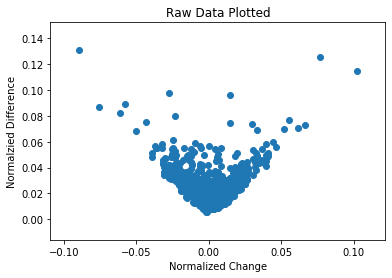

In [107]:
# Plotting values
plt.figure()
plt.title("Raw Data Plotted")
plt.xlabel("Normalized Change")
plt.ylabel("Normalzied Difference")
plt.scatter(features['Change'], features['Difference'])
 

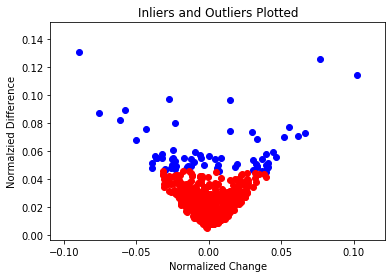

In [108]:
inliers = features[predictions == 1]
outliers = features[predictions == -1]

# Plotting values
plt.figure()
plt.title("Inliers and Outliers Plotted")
plt.xlabel("Normalized Change")
plt.ylabel("Normalzied Difference")
plt.scatter(inliers['Change'], inliers['Difference'], c='b')
plt.scatter(outliers['Change'], outliers['Difference'], c='r')

In [135]:
# For a new stock, predicting how much of the data is inlier vs outlier
newStock = ["AA"]
_, GE_stock_list = getStocks(data, newStock, num_days)

In [136]:
GE_stock = GE_stock_list[0]
GE_stock['Change'] = (GE_stock['Close'] - GE_stock['Open']) / GE_stock['Open']
GE_stock['Difference'] = (GE_stock['High'] - GE_stock['Low']) / GE_stock['Low']
GE_features = GE_stock[["Change", "Difference"]]
GE_features.head()

,Change,Difference
Date,,
2019-06-14,0.010698,0.039437
2019-06-17,0.005574,0.037264
2019-06-18,0.023150,0.065037
2019-06-19,-0.011910,0.032735
2019-06-20,-0.023851,0.035174


In [137]:
GE_pred = model.predict(GE_features)


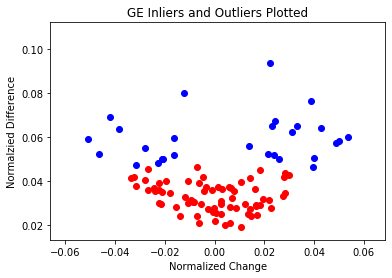

In [138]:
GE_inliers = GE_features[GE_pred == 1]
GE_outliers = GE_features[GE_pred == -1]

# Plotting values
plt.figure()
plt.title("GE Inliers and Outliers Plotted")
plt.xlabel("Normalized Change")
plt.ylabel("Normalzied Difference")
plt.scatter(GE_inliers['Change'], GE_inliers['Difference'], c='b')
plt.scatter(GE_outliers['Change'], GE_outliers['Difference'], c='r')